<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Demystifying Chi-Squared

Hywel Owen  
(c) University of Manchester  
29th February 2020

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random 

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## So Why Isn't $\chi^2=1$ All The Time Anyway?


In this notebook we will look at one of the most common questions that undergrads have when doing data analysis:    
>'Why isn't the $\chi^2$ value equal to 1 in my experiment? Does it mean my error bars are wrong?'  

We're going to look at this question with a few examples, in which we generate data in 'pretend' experiments.

### Experiment 1 - Ohm's Law, but only 4 data points

We imagine that we are doing an experiment involving Ohm's Law. We set a voltage $V$ and measure the resulting current $I$, where the ammeter is placed in series with some resistor $R = 10\Omega$. We assume here that our voltage supply is great (in other words it doesn't have any intrinsic error, so that the voltage we apply is actually the voltage we get).  

However, we have two other problems:
- Our ammeter (Ammeter 1) is crappy, and gives us some random noise around the true current - let's assume that it was +/-0.1 A in this ammeter;
- It's 5pm in the lab, so we can't be bothered to do more than 4 measurements - we also didn't even bother making them evenly-spaced out.  

Let's make some pretend data values for our pretend experiment:

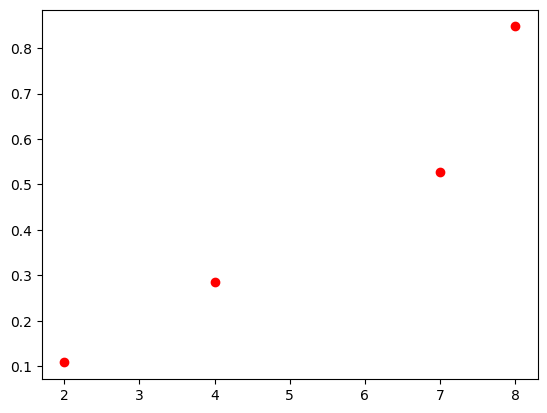

In [39]:
# Resistor value
Rtrue = 10
# Voltages we applied
Vvals = np.array([2, 4, 7, 8])
# Noise in ammeter
Inoise = 0.1
# Currents we measured
Ivals = Vvals/Rtrue + np.random.normal(0,Inoise,len(Vvals))

plt.plot(Vvals,Ivals,'ro')

We now carry out a linear regression to the data, using a built-in Python library:

In [40]:
fit_parameters = np.polyfit(Vvals,Ivals,1)
fit_m = fit_parameters[0]
fit_c = fit_parameters[1]
print('Linear np.polyfit of y = m*x + c')
print('Gradient  m = {:04.2f}'.format(fit_m))
print('Intercept c = {:04.2f}'.format(fit_c))

Linear np.polyfit of y = m*x + c
Gradient  m = 0.11
Intercept c = -0.15


We see that the **np.polyfit** command doesn't need to know the error bar size in order to calculate the line of best fit. But without those error bars we don't know the errors on $m$ or $c$. Never mind - this doesn't stop us calculating a $\chi^2$ value.  
  
We can also estimate the resistance from the gradient $m$. It's just $R = 1/m$:

In [41]:
# Calculate resistance from the data
Rest = 1/fit_m
print('Resistance  R = {:04.2f} Ohm'.format(Rest))

Resistance  R = 8.93 Ohm


To calculate $\chi^2$, we need the fitted values of $I$ for our experimentally-used values of $V$. The calculation is:

Chi-squared value         X     = 2.29
Reduced hi-squared value  X_red = 1.15


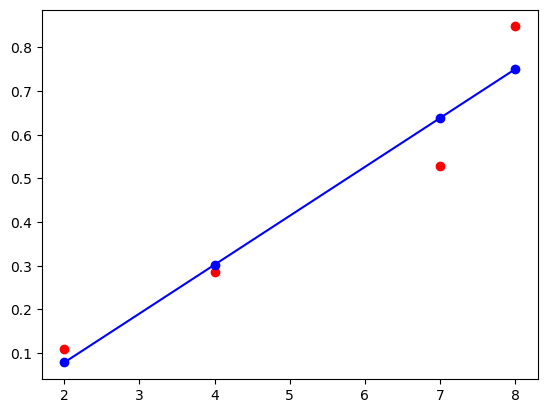

In [42]:
# Calculate fitted I values
Ifit = fit_m * Vvals + fit_c
# Plot them
plt.plot(Vvals,Ivals,'ro') # Measured data
plt.plot(Vvals,Ifit,'bo-') # Fitted line and points
# Calculate chi-squared value
chisquared = np.sum( (Ivals - Ifit)**2/(Inoise)**2 )
# Calculate number of degrees of freedom
ndf = len(Vvals) - 2 # 2 fit parameters (linear fit)
red_chisquared = chisquared/ndf
print('Chi-squared value         X     = {:04.2f}'.format(chisquared))
print('Reduced hi-squared value  X_red = {:04.2f}'.format(red_chisquared))

If you look at the reduced $\chi^2$ value, you will see it is most definitely *not* equal to 1 - try running the notebook again to see that it changes each time you run it, because (obviously) the random fluctuations are changing with each execution.  
  
  
So, have we made a mistake somehow? Did we 'assign' the error bars incorrectly? Of course not - we created data points according to some error bar size, and then calculated a $\chi^2$ value from them.

Let's try a different error bar size to see if it makes a difference. In other words we *use a different ammeter*. Let's call that Ammeter 2. It's a higher-quality ammeter.

Linear np.polyfit of y = m*x + c
Gradient  m = 0.01
Intercept c = 0.65
Resistance  R = 83.60 Ohm
Chi-squared value         X     = 1.60
Reduced hi-squared value  X_red = 0.80


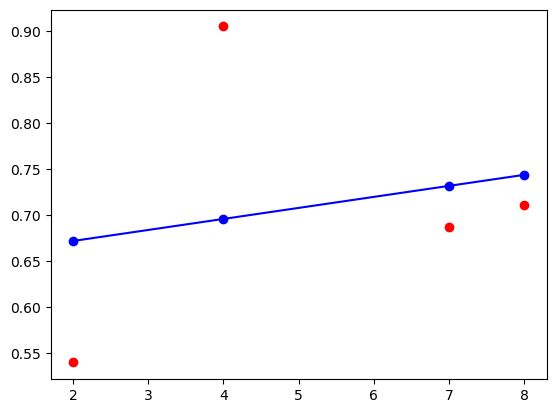

In [54]:
# Do the calculation again, but with different Inoise value
# ----------------------------
# Resistor value
Rtrue = 10
# Voltages we applied
Vvals = np.array([2, 4, 7, 8])
# Noise in ammeter
Inoise = 0.2 # Here we have changed the Inoise value
# Currents we measured
Ivals = Vvals/Rtrue + np.random.normal(0,Inoise,len(Vvals))# Calculate fitted I values
# Fit a line to the data
fit_parameters = np.polyfit(Vvals,Ivals,1)
fit_m = fit_parameters[0]
fit_c = fit_parameters[1]
print('Linear np.polyfit of y = m*x + c')
print('Gradient  m = {:04.2f}'.format(fit_m))
print('Intercept c = {:04.2f}'.format(fit_c))
# Calculate resistance from the data
Rest = 1/fit_m
print('Resistance  R = {:04.2f} Ohm'.format(Rest))
# Calculate fitted I values
Ifit = fit_m * Vvals + fit_c
# Plot the data and fit
plt.plot(Vvals,Ivals,'ro') # Measured data
plt.plot(Vvals,Ifit,'bo-') # Fitted line and points
# Calculate chi-squared value
chisquared = np.sum( (Ivals - Ifit)**2/(Inoise)**2 )
# Calculate number of degrees of freedom
ndf = len(Vvals) - 2 # 2 fit parameters (linear fit)
red_chisquared = chisquared/ndf
print('Chi-squared value         X     = {:04.2f}'.format(chisquared))
print('Reduced hi-squared value  X_red = {:04.2f}'.format(red_chisquared))

Again, the reduced $\chi^2$ value is not 1.

### Experiment 2 - Ohm's Law, but with 10 data points

How about if we have more data points? We pretend now that it's 4.30pm in the lab, and we have time for 10 data points.  
  
Again, we create some pretend data points and analyse them:

Linear np.polyfit of y = m*x + c
Gradient  m = 0.10
Intercept c = 0.01
Resistance  R = 9.80 Ohm
Chi-squared value         X     = 4.95
Reduced hi-squared value  X_red = 0.62


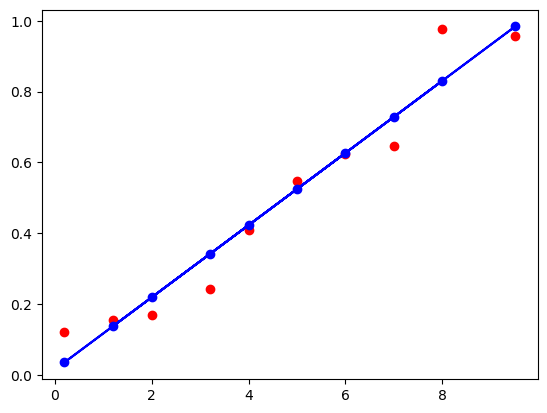

In [62]:
# Do the calculation again, but with more data points
# ----------------------------
# Resistor value
Rtrue = 10
# Voltages we applied
# (with some more data points; notice that they don't have to be in sequence)
Vvals = np.array([2, 4, 7, 8, 1.2, 3.2, 9.5, 0.2, 6, 5])
# Noise in ammeter
Inoise = 0.1 # Here we have changed the Inoise value
# Currents we measured
Ivals = Vvals/Rtrue + np.random.normal(0,Inoise,len(Vvals))# Calculate fitted I values
# Fit a line to the data
fit_parameters = np.polyfit(Vvals,Ivals,1)
fit_m = fit_parameters[0]
fit_c = fit_parameters[1]
print('Linear np.polyfit of y = m*x + c')
print('Gradient  m = {:04.2f}'.format(fit_m))
print('Intercept c = {:04.2f}'.format(fit_c))
# Calculate resistance from the data
Rest = 1/fit_m
print('Resistance  R = {:04.2f} Ohm'.format(Rest))
# Calculate fitted I values
Ifit = fit_m * Vvals + fit_c
# Plot the data and fit
plt.plot(Vvals,Ivals,'ro') # Measured data
plt.plot(Vvals,Ifit,'bo-') # Fitted line and points
# Calculate chi-squared value
chisquared = np.sum( (Ivals - Ifit)**2/(Inoise)**2 )
# Calculate number of degrees of freedom
ndf = len(Vvals) - 2 # 2 fit parameters (linear fit)
red_chisquared = chisquared/ndf
print('Chi-squared value         X     = {:04.2f}'.format(chisquared))
print('Reduced hi-squared value  X_red = {:04.2f}'.format(red_chisquared))

We see that the $\chi^2$ value is (of course) larger, and the reduced $\chi^2$ is (often) closer to 1. But it's **still** not equal to 1.  
  
  
The interpretation is quite clear. When you have only 1 set of experimental data (you only had time to do 1 experiment), then your reduced $\chi^2$ value is not going to be 1. If you repeat the experiment you will get a different reduced $\chi^2$ - each experiment is effectively drawing a $\chi^2$ 'sample' from some distribution of possible $\chi^2$ values whose shape depends upon how many data points you took. Obviously, this distribution is called the $\chi^2$ distribution.

![](img/bee.png)
## Doing the same experiment lots of times

Now we imagine we have **lots** of time to do the same experiment, over and over again. But - each time - we only take 4 data points. What do we suppose the $\chi^2$ values will look like?  
  
It's easiest to do this analysis if we create a function that lets us choose a number of data points, a noise value in the ammeter, and then gives us *just* the reduced $\chi^2$ value. Let's write that function:

In [72]:
def do_experiment(num_Vvals, Inoise):
    Rtrue = 10
    # Create some Vvals from 0 to 10
    Vvals = 10*np.random.random(num_Vvals)
    Ivals = Vvals/Rtrue + np.random.normal(0,Inoise,len(Vvals))
    fit_parameters = np.polyfit(Vvals,Ivals,1)
    fit_m = fit_parameters[0]
    fit_c = fit_parameters[1]
    Ifit = fit_m * Vvals + fit_c
    chisquared = np.sum( (Ivals - Ifit)**2/(Inoise)**2 )
    ndf = len(Vvals) - 2
    red_chisquared = chisquared/ndf
    
    return red_chisquared

We can now in a single line of code 'do an experiment' and obtain a (pretend) reduced $\chi^2$ value:

In [71]:
do_experiment(10,0.1)

1.0718810970061776

We can now create a table of reduced $\chi^2$ values for, say, 10 experiments:

In [75]:
experiment_chisquared_vals = np.zeros(10)
for i in range(10):
    experiment_chisquared_vals[i] = do_experiment(10,0.1)
print(experiment_chisquared_vals)

[0.96162324 1.31317265 1.06170899 1.62538173 0.5502546  2.92900353
 0.86743309 1.26334717 0.50142431 1.17941782]


We now very clearly see that the reduced $\chi^2$ value changes each time we do the experiment. We probably want to histogram this to see what that looks like:

(array([2., 2., 2., 2., 1., 0., 0., 0., 0., 1.]),
 array([0.50142431, 0.74418223, 0.98694016, 1.22969808, 1.472456  ,
        1.71521392, 1.95797184, 2.20072976, 2.44348768, 2.68624561,
        2.92900353]),
 <a list of 10 Patch objects>)

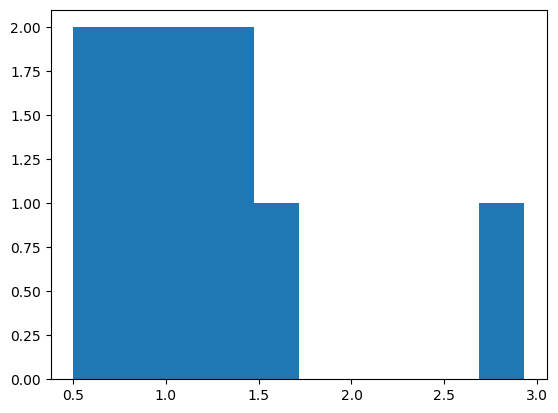

In [77]:
plt.hist(experiment_chisquared_vals)

That's not very good yet, since there are not enough 'experiments' do do a decent histogram. Let's create another function that creates a set of reduced $\chi^2$ values for a given number of experiments:

In [78]:
def do_n_experiments(n, num_Vvals, Inoise):
    # Create an empty set of chi-squared values, one for each 'experiment'
    experiment_chisquared_vals = np.zeros(n)
    for i in range(n):
        # Do 'experiment' and get the reduced chi-squared value
        experiment_chisquared_vals[i] = do_experiment(num_Vvals,Inoise)
    
    # Return all the reduced chi-squared values
    return experiment_chisquared_vals

We can now do 1000 'experiments' and see what the distribution of reduced $\chi^2$ values looks like. Here it is for 4 data points in each experiment:

(array([518., 239., 113.,  62.,  36.,  14.,   9.,   6.,   2.,   1.]),
 array([4.14330097e-04, 7.07760387e-01, 1.41510644e+00, 2.12245250e+00,
        2.82979856e+00, 3.53714461e+00, 4.24449067e+00, 4.95183673e+00,
        5.65918278e+00, 6.36652884e+00, 7.07387490e+00]),
 <a list of 10 Patch objects>)

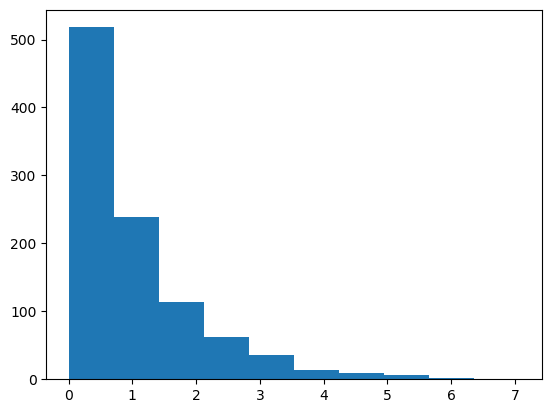

In [179]:
plt.hist(do_n_experiments(1000, 4, 0.1))

And here it is for 10 data points in each experiment:

(array([115., 269., 287., 180.,  90.,  39.,  13.,   3.,   3.,   1.]),
 array([0.08168787, 0.44654167, 0.81139547, 1.17624927, 1.54110306,
        1.90595686, 2.27081066, 2.63566446, 3.00051826, 3.36537206,
        3.73022586]),
 <a list of 10 Patch objects>)

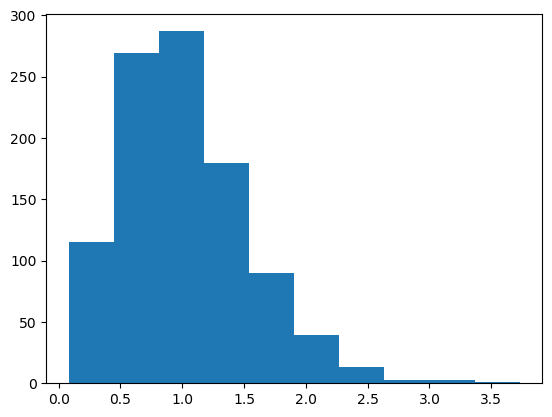

In [180]:
plt.hist(do_n_experiments(1000, 10, 0.1))

An obvious question is: is the average value of reduced $\chi^2$ equal to 1? Let's find out:

In [85]:
np.mean(do_n_experiments(1000, 10, 0.1))

1.0016534425391295

In [87]:
np.mean(do_n_experiments(1000, 4, 0.1))

0.972513419760562

In [88]:
np.mean(do_n_experiments(1000, 10, 0.5))

0.9820250409276164

Yes: when we change the number of data points or the noise level, the mean value of the reduced $\chi^2$ stays around 1, as we would expect it to.

### Comparing the 'experimental' $\chi^2$ values to the $\chi^2$ distribution

Obviously, the next thing to do is to compare our pretend 'experiment' reduced $\chi^2$ values to the $\chi^2$ distribution. To do this, we note first that the histograms we plotted above were the *frequencies* of how many experiments gave a particular $\chi^2$ value. Really, we should be using this same 'experimental' data to work out the  *probability* that a particular 'experiment' will yield a particular $\chi^2$ value.  
  
To do this, we simply take all our frequencies and divide by the number of experiments we did. First we extract the actual frequencies from a histogram:

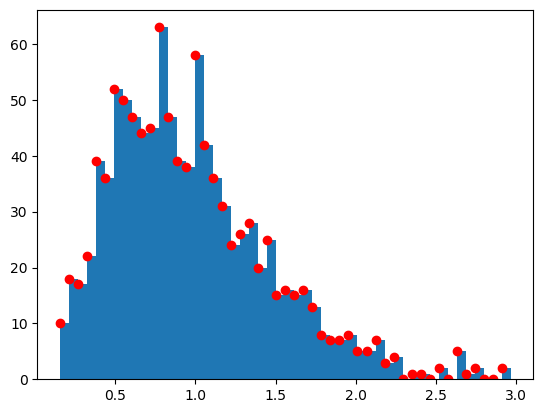

In [110]:
n_experiments = 1000
n_bins = 50
chi2vals = do_n_experiments(n_experiments, 10, 0.1)
chi2frequencies, chi2binnedvals = np.histogram(chi2vals, bins = n_bins)
chi2binnedvals = chi2binnedvals[:-1] # Remove last item in the array so we can plot it
# Make the histogram
plt.hist(chi2vals, bins = n_bins)
# Show the frequencies on top, so we see that they are the same
plt.plot(chi2binnedvals,chi2frequencies,'ro')

Next, we compute the *probability* $P(\chi^2) d\chi^2$ rather than the *frequency* $f(\chi^2) d\chi^2$. This is just $p=f/n$ where $n$ is the number of experiments:

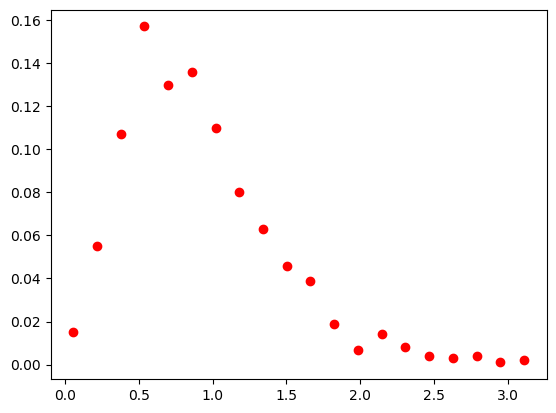

In [156]:
n_experiments = 1000 # Number of experiments performed
n_data = 10 # Number of data points taken in each experiment
n_bins = 20
ndf = n_data - 2 # Linear fit
chi2vals = do_n_experiments(n_experiments, 10, 0.1)
chi2frequencies, chi2binnedvals = np.histogram(chi2vals, bins = n_bins)
# Calculate the probabilities
chi2probabilities = chi2frequencies/n_experiments
chi2binnedvals = chi2binnedvals[:-1] # Remove last item in the array so we can plot it
# Show the probabilities
plt.plot(chi2binnedvals,chi2probabilities,'ro')

In [142]:
# Check the chi-squared probabilities add up to 1
sum(chi2probabilities)

0.15325964933173858

Now, we plot the $\chi^2$ distribution for the same number of degrees of freedom:

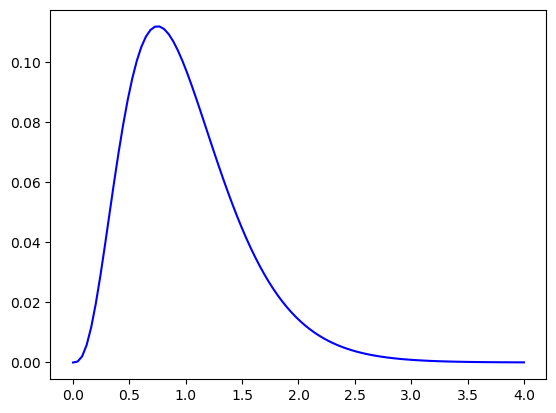

In [157]:
# Import the chi2 distribution function
from scipy.stats import chi2
# Create some x values, scaling for the number of degrees of freedom
x_chi2 = ndf*np.linspace(0,4,100)
# Calculate the corresponding theoretical chi-squared values
P_chi2 = chi2.pdf(x_chi2, ndf)
# Plot them out
plt.plot(x_chi2/ndf,P_chi2,'b-')

Obviously, we want to plot them together. We see that they have the same shape apart from a scaling factor to do with the bin width:

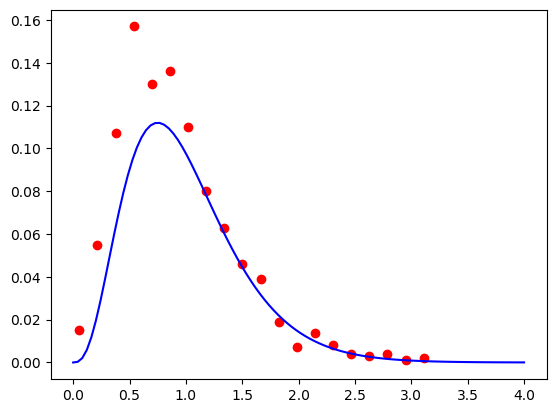

In [158]:
plt.plot(chi2binnedvals,chi2probabilities,'ro')
plt.plot(x_chi2/ndf,P_chi2,'b-')

Another way to show that the $\chi^2$ values are as we expect is to draw values from a theoretical $\chi^2$ distribution, and show that they are the same:

(array([69., 98., 87., 93., 87., 80., 59., 70., 45., 34., 42., 40., 35.,
        34., 22.,  7., 15.,  8.,  6.,  9., 11., 10.,  5.,  6.,  1.,  6.,
         5.,  3.,  4.,  0.,  1.,  1.,  0.,  0.,  1.,  3.,  1.,  1.,  0.,
         1.]),
 array([ 0.02277264,  0.40412748,  0.78548231,  1.16683715,  1.54819199,
         1.92954682,  2.31090166,  2.6922565 ,  3.07361133,  3.45496617,
         3.83632101,  4.21767584,  4.59903068,  4.98038551,  5.36174035,
         5.74309519,  6.12445002,  6.50580486,  6.8871597 ,  7.26851453,
         7.64986937,  8.0312242 ,  8.41257904,  8.79393388,  9.17528871,
         9.55664355,  9.93799839, 10.31935322, 10.70070806, 11.0820629 ,
        11.46341773, 11.84477257, 12.2261274 , 12.60748224, 12.98883708,
        13.37019191, 13.75154675, 14.13290159, 14.51425642, 14.89561126,
        15.2769661 ]),
 <a list of 40 Patch objects>)

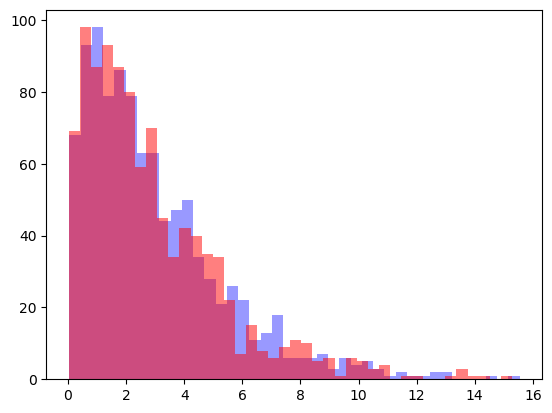

In [175]:
n_experiments = 1000 # Number of experiments performed
n_data = 5 # Number of data points taken in each experiment
n_bins = 40
ndf = n_data - 2 # Linear fit
chi2vals = do_n_experiments(n_experiments, n_data, 0.1)
# Histogram the actual samples
# (alpha value sets the transparency of the histogram bars)
plt.hist(ndf*chi2vals, bins = n_bins, alpha = 0.4, color = 'blue')
# Draw samples from a theoretical distribution, and histogram them
plt.hist(np.random.chisquare(ndf, n_experiments), bins = n_bins, alpha = 0.5, color = 'red')

We can do this for a number of different situations, to show that the two plots are always the same:

(array([ 26.,  69., 147., 241., 310., 369., 397., 355., 379., 381., 359.,
        300., 286., 217., 188., 177., 158., 129.,  90., 109.,  68.,  47.,
         47.,  29.,  30.,  22.,  20.,  11.,  10.,   7.,   3.,   5.,   3.,
          3.,   4.,   2.,   1.,   0.,   0.,   1.]),
 array([ 0.65037591,  1.3461607 ,  2.04194549,  2.73773028,  3.43351507,
         4.12929986,  4.82508465,  5.52086945,  6.21665424,  6.91243903,
         7.60822382,  8.30400861,  8.9997934 ,  9.69557819, 10.39136298,
        11.08714777, 11.78293256, 12.47871735, 13.17450214, 13.87028694,
        14.56607173, 15.26185652, 15.95764131, 16.6534261 , 17.34921089,
        18.04499568, 18.74078047, 19.43656526, 20.13235005, 20.82813484,
        21.52391964, 22.21970443, 22.91548922, 23.61127401, 24.3070588 ,
        25.00284359, 25.69862838, 26.39441317, 27.09019796, 27.78598275,
        28.48176754]),
 <a list of 40 Patch objects>)

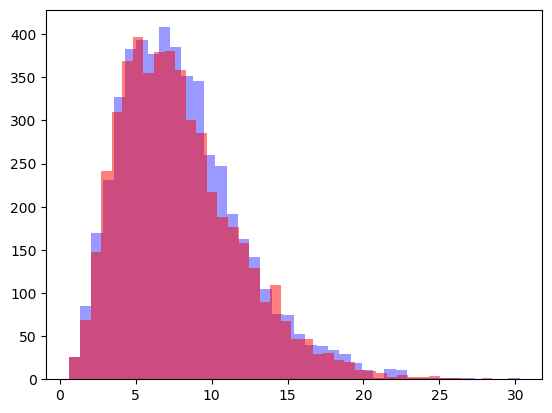

In [177]:
n_experiments = 5000 # Number of experiments performed
n_data = 10 # Number of data points taken in each experiment
n_bins = 40
ndf = n_data - 2 # Linear fit
chi2vals = do_n_experiments(n_experiments, n_data, 0.1)
# Histogram the actual samples
# (alpha value sets the transparency of the histogram bars)
plt.hist(ndf*chi2vals, bins = n_bins, alpha = 0.4, color = 'blue')
# Draw samples from a theoretical distribution, and histogram them
plt.hist(np.random.chisquare(ndf, n_experiments), bins = n_bins, alpha = 0.5, color = 'red')

(array([  1.,   0.,   3.,   7.,   8.,  32.,  69., 106., 168., 237., 304.,
        376., 377., 424., 390., 415., 405., 333., 308., 260., 177., 150.,
        131.,  96.,  68.,  49.,  33.,  23.,  14.,  13.,   6.,   6.,   3.,
          2.,   2.,   0.,   1.,   0.,   2.,   1.]),
 array([10.12931324, 11.95030586, 13.77129848, 15.5922911 , 17.41328373,
        19.23427635, 21.05526897, 22.8762616 , 24.69725422, 26.51824684,
        28.33923947, 30.16023209, 31.98122471, 33.80221733, 35.62320996,
        37.44420258, 39.2651952 , 41.08618783, 42.90718045, 44.72817307,
        46.54916569, 48.37015832, 50.19115094, 52.01214356, 53.83313619,
        55.65412881, 57.47512143, 59.29611405, 61.11710668, 62.9380993 ,
        64.75909192, 66.58008455, 68.40107717, 70.22206979, 72.04306242,
        73.86405504, 75.68504766, 77.50604028, 79.32703291, 81.14802553,
        82.96901815]),
 <a list of 40 Patch objects>)

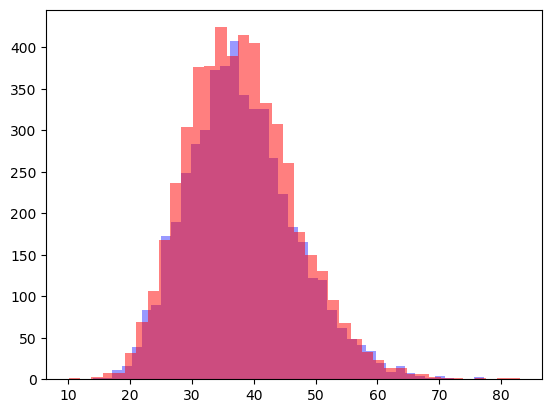

In [178]:
n_experiments = 5000 # Number of experiments performed
n_data = 40 # Number of data points taken in each experiment
n_bins = 40
ndf = n_data - 2 # Linear fit
chi2vals = do_n_experiments(n_experiments, n_data, 0.1)
# Histogram the actual samples
# (alpha value sets the transparency of the histogram bars)
plt.hist(ndf*chi2vals, bins = n_bins, alpha = 0.4, color = 'blue')
# Draw samples from a theoretical distribution, and histogram them
plt.hist(np.random.chisquare(ndf, n_experiments), bins = n_bins, alpha = 0.5, color = 'red')

Hopefully, you will see that when we perform an experiment we do **not** expect the $\chi^2$ value to be the same every time. However, over a large number of experiments we see that the probability of obtaining a particular $\chi^2$ (in a particular *single* experiment) follows the $\chi^2$ distribution.